# <span style="color:#336699">Web Crop Phenology Metrics Service (WCPMS) Region</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Gabriel Sansigolo<sup><a href="https://orcid.org/0000-0003-0789-5858"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: Sept 14, 2024
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook explains how to use the WCPMS service to extract phenology metrics on regions from <em>Earth Observation Data Cubes</em>.
</div>

<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is a supplement to the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Sansigolo, G.; Queiroz, G. R.; Ferreira, K. R.; Adami, M.; Körting, T.<a href="http://www.google.com" target="_blank">A Web Service for Crop Sowing and Harvesting Detection from Earth Observation Data Cubes.
    </div>
</div>

# Introduction
<hr style="border:1px solid #0077b9;">

Called Web Crop Phenology Metrics Service (WCPMS) the software extracts phenological metrics from big EO image collections, modeled as multidimensional data cubes, produced by the BDC project of INPE. 

It allows analysts to calculate phenological metrics on cloud. The opposite of the on-premises established algorithms, so with no need to download big EO data sets on their personal computers. 

We created the wcpms.py library from scratch to facilitate phenology extraction operations. This library was developed to be interoperable with other Python libraries, thus enabling users to integrate established libraries into their own workflows for pre- or post-processing and analysis. The wcpms.py library has a group of functions, the main ones are:

- ``get_collections``: returns in list format the unique identifier of each of the data cubes available in the BDC’s SpatioTemporal Asset Catalogs (STAC).

- ``get_description``: returns in dictionary format the information on each of the phenology metrics, such as code, name, description and method. 	

- ``get_phenometrics``: returns in dictionary form all the phenological metrics calculated for the given spatial location.

- ``get_phenometrics_region``: returns in list format the phenological metrics calculated for each pixel centers within the boundaries of the given region using satellite images time series.


To read more, access the documentation at https://wcpms.readthedocs.io/en/latest.

## Web Service
<hr style="border:1px solid #0077b9;">

The architecture of the proposed web service is made up of two sides: (1) the server-side and (2) the client-side. It will allow analysts to calculate phenological metrics from data cubes with no need to download big EO datasets to their personal computers. 

The web service runs on the server-side, so everything related to it, such as the libraries for calculating phenological metrics, the access to the web service for extracting time series (WTSS), is on the cloud, so it doesn’t require any package installation. 

<div align="center">
    <figcaption><strong>Figure 1</strong> - Architecture of the web service for phenological metrics extraction </figcaption>
    <img src="https://github.com/GSansigolo/wcpms.py/blob/master/docs/sphinx/img/wcpms_architecture.png?raw=true" align="center" width="768"/>
    <br>
</div>

# Python Client API
<hr style="border:1px solid #0077b9;">

For running the examples in this Jupyter Notebook you will need to install the [WCPMS client for Python](https://github.com/brazil-data-cube/wcpms.py). To install it from PyPI using `pip`, use the following command:

In [1]:
!pip install wcpms

In order to access the funcionalities of the client API, you should import the `wcpms` package and `os` package, as follows:

In [2]:
import os
from wcpms import *

After that, you should add the `wcpms` service url:

In [3]:
wcpms_url = 'https://data.inpe.br/bdc/wcpms' 

The above cell will create an string named `service` that will save the wcpms url for future use.

# Select Data Cube
<hr style="border:1px solid #0077b9;">

Before creating a data cube query, it is important to select a data cubes from the BDC catalog. It is possible to retrive a list with avaliable data cubes with the `get_collections` function:

In [4]:
colections=get_collections(
    url = wcpms_url
)

colections

['CBERS4-MUX-2M-1',
 'CBERS4-WFI-16D-2',
 'CBERS-WFI-8D-1',
 'LANDSAT-16D-1',
 'mod11a2-6.1',
 'mod13q1-6.1',
 'myd11a2-6.1',
 'myd13q1-6.1',
 'S2-16D-2']

# Creating a Data Cube Query
<hr style="border:1px solid #0077b9;">

To make it easier to use, there is a function to create a data cube query called `cube_query`:

In [5]:
datacube=cube_query(
    collection="S2-16D-2",
    start_date="2022-01-01",
    end_date="2022-12-31",
    freq="16D",
    band="NDVI"
)

# Opening a shapefile to select a region
<hr style="border:1px solid #0077b9;">

To easily open a shapefile you can use the geopandas (gpd) contained in the wcpms library, there is a function called `gpd_shapefile`:

In [6]:
path_dir = os.path.dirname("")

In [7]:
polygon = gpd_read_file(os.path.join(path_dir, "LEM_dataset_small/LEM_dataset_small.shp"))

polygon = polygon[polygon['id'] == '458']   
polygon

,id,Oct_2019,Nov_2019,Dec_2019,Jan_2020,Feb_2020,Mar_2020,Apr_2020,May_2020,Jun_2020,Jul_2020,Aug_2020,Sep_2020,Note,geometry
93,458,Uncultivated soil,Uncultivated soil,Soybean,Soybean,Soybean,Uncultivated soil,Uncultivated soil,Corn,Corn,Corn,Corn,Uncultivated soil,None,"POLYGON ((-45.8354 -12.24886, -45.83535 -12.24..."


In order to retrieve the phenological metrics associated with a region, it's necessary to use the `get_phenometrics_region` function.

# Retrieving the Phenological Metrics for Region 
<hr style="border:1px solid #0077b9;">

In order to retrieve the phenological metrics associated with a region we use `get_timeseries_region` and `get_phenometrics_region` functions. The metrics are calculated using time series `NDVI`, for each pixel centers within the boundaries of the given region from `January 1st, 2022` to `December 31st, 2022`.

In [8]:
timeseries=get_timeseries_region(
    url=wcpms_url,
    cube=datacube,
    geom=gdf_to_geojson(polygon["geometry"])
)

In [9]:
len(timeseries)

2967

In [10]:
phenometrics=get_phenometrics_region(
    url=wcpms_url,
    cube=datacube,
    timeseries=timeseries[:500] #limit
)

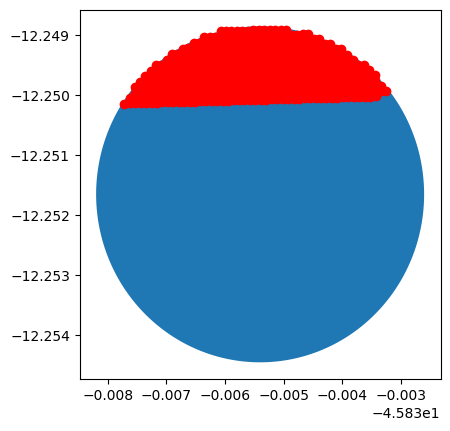

In [11]:
plot_points_region(polygon, phenometrics)

In [12]:
phenometrics = []
for i in range(0, len(timeseries), 500):
    end = min(i + 500, len(timeseries))  
    phenometrics = phenometrics + get_phenometrics_region(
        url=wcpms_url,
        cube=datacube,
        timeseries=timeseries[i:end]
    )
    print(f"Processing from {i} to {end}")

Processing from 0 to 500
Processing from 500 to 1000
Processing from 1000 to 1500
Processing from 1500 to 2000
Processing from 2000 to 2500
Processing from 2500 to 2967


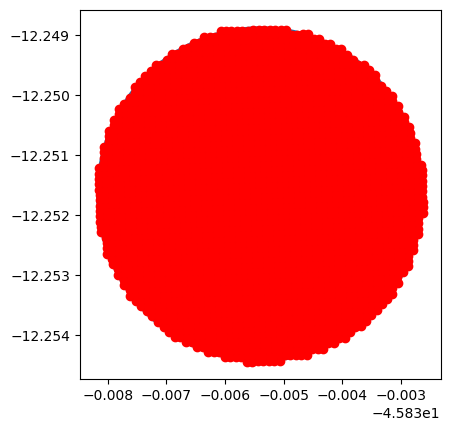

In [13]:
plot_points_region(polygon, phenometrics)

In [14]:
len(phenometrics)

2967

In [15]:
phenometrics[2006]

{'phenometrics': {'aos_v': 0.9282000064849854,
  'bse_v': 0.47780001163482666,
  'eos_t': '2022-03-07T00:00:00',
  'eos_v': 0.19789999723434448,
  'lios_v': 3.0995497703552246,
  'liot_v': 11.779150009155273,
  'los_v': 65.0,
  'mos_v': 0.9226049780845642,
  'pos_t': '2022-01-02T00:00:00',
  'pos_v': 0.9419000148773193,
  'rod_v': 0.011625000275671482,
  'roi_v': -9999,
  'sios_v': 3.0378997325897217,
  'siot_v': 11.477749824523926,
  'sos_t': '2022-01-01T00:00:00',
  'sos_v': -9999,
  'vos_t': '2022-11-18T00:00:00',
  'vos_v': 0.013700000010430813},
 'point': [-45.83783423711872, -12.252555099336767],
 'timeline': ['2022-01-01',
  '2022-01-17',
  '2022-02-02',
  '2022-02-18',
  '2022-03-06',
  '2022-03-22',
  '2022-04-07',
  '2022-04-23',
  '2022-05-09',
  '2022-05-25',
  '2022-06-10',
  '2022-06-26',
  '2022-07-12',
  '2022-07-28',
  '2022-08-13',
  '2022-08-29',
  '2022-09-14',
  '2022-09-30',
  '2022-10-16',
  '2022-11-01',
  '2022-11-17',
  '2022-12-03',
  '2022-12-19'],
 'timeser

In [16]:
plot_advanced_phenometrics(cube=datacube, ds_phenos=phenometrics[2600])

In [17]:
plot_advanced_phenometrics(cube=datacube, ds_phenos=phenometrics[2020])

# Retrieve Description
<hr style="border:1px solid #0077b9;">

Once you start using wcpms to extract phenology metrics, the information about each metric becomes very important. To help you with that, we provide a complete description of all the metrics provided by the service. It is possible to plot a table with all the descriptions with the `get_description` function:

In [18]:
description=get_description(
    url = wcpms_url
)

description

Code,Name,Description,Method,Value,Time
POS,Peak of Season,Highest vegetation value and time of season.,Maximum value in a timeseries.,True,True
MOS,Middle of Season,Mean vegetation value and time of values in top 80 of season.,"Mean value and time where the left and right slope edges have increased and decreased to the 80 level of the season, respectively.",True,False
VOS,Valley of Season,Lowest vegetation value and time of season.,Minimum value in a timeseries.,True,True
BSE,Base,Mean of the lowest vegetation values in season.,Mean value of the lowest vegetation values to the left and right of Peak of Season.,True,False
SOS,Start of Season,Vegetation value and time at the start of season.,Six methods available: 1) seasonal amplitude; 2) absolute amplitude; 3) Relative amplitude; 4) LOESS STL Trend line; 5) First value of positive slope; and 6) Median value of positive slope.,True,True
EOS,End of season,Vegetation value and time at the end of season.,Six methods available: 1) seasonal amplitude; 2) absolute amplitude; 3) Relative amplitude; 4) LOESS STL Trend line; 5) First value of negative slope; and 6) Median value of negative slope.,True,True
LOS,Length of Season,Length of time (number of days) between the start and end of season.,The day of year at SOS minus EOS.,False,True
ROI,Rate of Increase,The rate of vegetation 'green up' at the beginning of season.,Calculated as the ratio of the difference between the left 20 and 80 levels and the corresponding time difference.,True,False
ROD,Rate of Decrease,The rate of vegetation 'green down' at the end of season.,Calculated as the ratio of the difference between the right 20 and 80 levels and the corresponding time difference.,True,False
AOS,Amplitude of Season,The amplitude of vegetation values for season.,The difference between the maximum value and the VOS/BSE value.,True,False


# References
<hr style="border:1px solid #0077b9;">

# See also the following Jupyter Notebooks
<hr style="border:1px solid #0077b9;">

* [WCPMS Introduction Examples](./wcpms-introduction.ipynb)